In [250]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
sys.path.append(os.path.join('/Users/cd8607/Documents/Lammps_MD/', 'git_folder', 'Classes'))
import He_Fitting
import Handle_PotFiles_He
import time
import glob
from scipy.optimize import minimize
os.chdir('/Users/cd8607/Documents/Lammps_MD')
from scipy.integrate import simpson
from scipy.signal import find_peaks

In [251]:

def Beck1968(r):

    A = 398.7
    a = 0.675
    alpha = 4.390
    beta = 3.746e-4

    return  A*np.exp(-alpha*r - beta*r**6) - (0.869/((r**2 + a**2)**3)) * (1 + ((2.709 + 3*a**2)/(r**2 + a**2)))


fig_width = 8
fig_height = 6


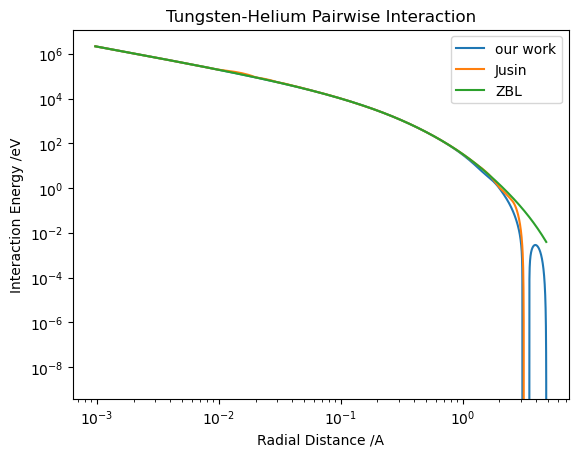

In [252]:
pot, potlines, pot_params = Handle_PotFiles_He.read_pot('git_folder/Potentials/final.eam.he')
pot_beck, potlines, pot_params = Handle_PotFiles_He.read_pot('git_folder/Potentials/beck_full.eam.he')

r = np.linspace(0, pot_params['rc'], pot_params['Nr'])

whe = pot['W-He'][1:]/r[1:]
jus = pot_beck['W-He'][1:]/r[1:]

zbl_class = He_Fitting.ZBL(74, 2)


plt.loglog(r[1:], whe, label='our work')
plt.loglog(r[1:], jus, label='Jusin')
plt.loglog(r[1:], zbl_class.eval_zbl(r[1:]), label='ZBL')

plt.xlabel('Radial Distance /A')
plt.ylabel('Interaction Energy /eV')
plt.title('Tungsten-Helium Pairwise Interaction')
plt.legend()

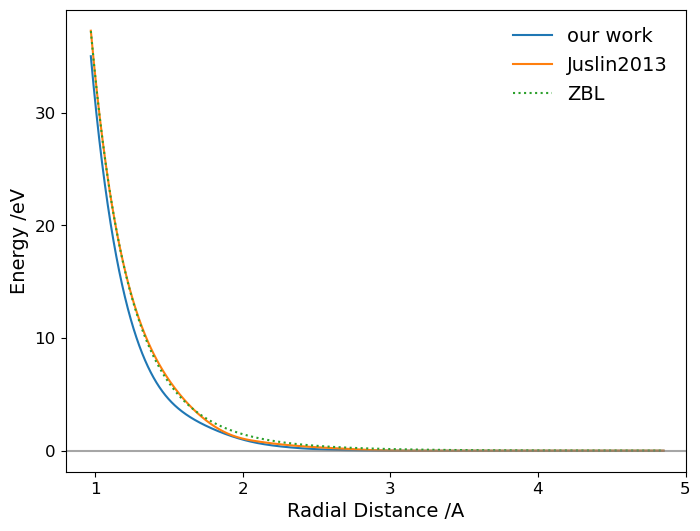

In [253]:
k = 1000
plt.figure(figsize=(fig_width, fig_height))
plt.plot(r[k + 1:], whe[k:], label='our work')
plt.plot(r[k + 1:], jus[k:], label='Juslin2013')
plt.plot(r[k + 1:], zbl_class.eval_zbl(r[k + 1:]), label='ZBL',  linestyle=':')
# plt.scatter(r[whe.argmin() + 1], whe.min())
# plt.text(r[whe.argmin() + 1], whe.min()+0.25, 'Minima: %.4f eV at r: %.3f A' % (whe.min(), r[whe.argmin() + 1]))
plt.xlabel('Radial Distance /A', fontsize = 14)
plt.ylabel('Energy /eV', fontsize = 14)
# plt.title('Tungsten-Helium Pairwise Interaction')
plt.legend(frameon=False, fontsize = 14)
plt.xticks([1, 2, 3, 4,5])
plt.yticks([0, 10, 20, 30,40])
plt.xlim([0.8, 5])
plt.plot([0.8,5], [0,0], 'gray', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('../Potential_Images/w-he-pairwise.png', bbox_inches='tight')

0.1295017183091722 0.06114245421990408


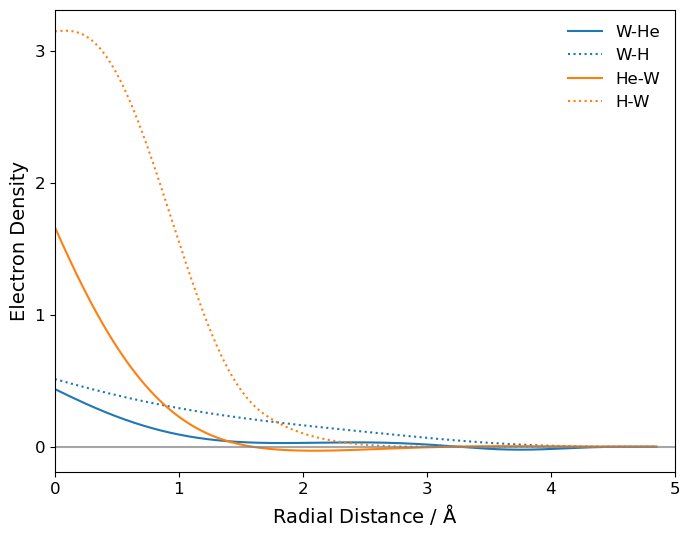

In [254]:
rho = np.linspace(pot_params['rhomin'], pot_params['rho_c'], pot_params['Nrho'])
hef = pot['He F']
w_he_p = pot['W-He p']

bonds = np.array([[2, 4], [2.8, 4], [3.61, 8]])

y = np.interp(bonds[:, 0], r, w_he_p)

e_density = np.sum( y * bonds[:, 1] )
plt.figure(figsize=(fig_width, fig_height))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.plot(r, w_he_p, label='W-He', color='tab:blue')
plt.plot(r, pot['W-H p'], label='W-H',linestyle=':', color='tab:blue')
plt.plot(r, pot['He-W p'], label='He-W', color='tab:orange')
plt.plot(r, pot['H-W p'], label='H-W', linestyle=':', color='tab:orange')

plt.legend(frameon=False, fontsize = 12)

embed = np.interp(e_density, rho, hef)

print(embed, e_density)
plt.yticks([0,1,2,3])
plt.xlabel(r'Radial Distance / $\mathrm{\AA}$', fontsize = 14)
plt.ylabel('Electron Density', fontsize = 14)
plt.xlim([0, 5])
plt.plot([0,5], [0,0], 'gray', alpha=0.7)

plt.savefig('../Potential_Images/w-he-electron_densties.png', bbox_inches='tight')

0.1295017183091722 0.06114245421990408


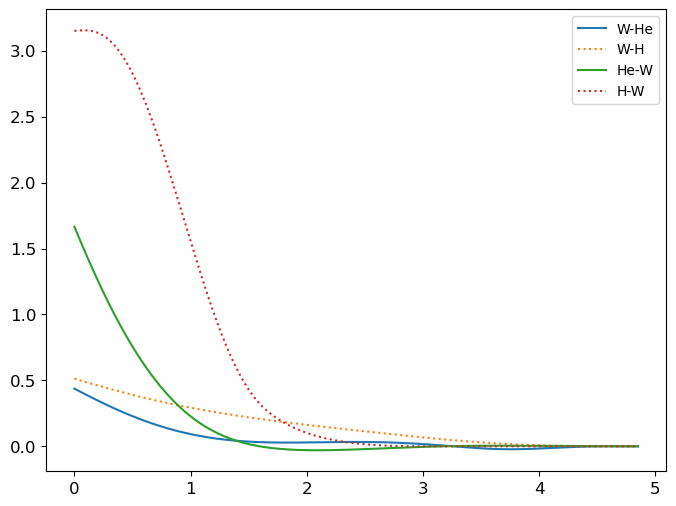

In [255]:
rho = np.linspace(pot_params['rhomin'], pot_params['rho_c'], pot_params['Nrho'])
hef = pot['He F']
w_he_p = pot['W-He p']

bonds = np.array([[2, 4], [2.8, 4], [3.61, 8]])

y = np.interp(bonds[:, 0], r, w_he_p)

e_density = np.sum( y * bonds[:, 1] )
plt.figure(figsize=(fig_width, fig_height))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.plot(r, w_he_p, label='W-He')
plt.plot(r, pot['W-H p'], label='W-H',linestyle=':',)
plt.plot(r, pot['He-W p'], label='He-W')
plt.plot(r, pot['H-W p'], label='H-W', linestyle=':')

plt.legend()
plt.legend()

embed = np.interp(e_density, rho, hef)
plt.xticks([0, 1, 2, 3, 4, 5])
print(embed, e_density)

# plt.savefig('../Potential_Images/w-he-electron_densties.png')

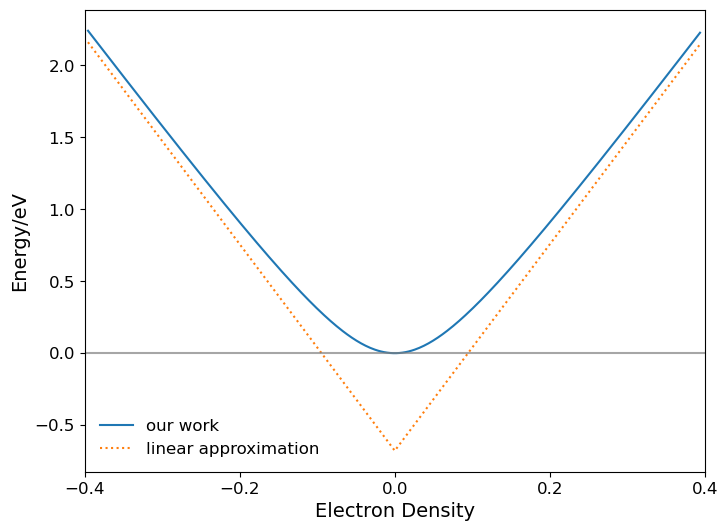

In [256]:
# plt.plot(rho[800:1200], hef[800:1200], label=r'$F_{\mathrm{He}}$')

hf = pot['H F']
w = np.array([7.173175729203135  ,0.677984683567253 ])
plt.figure(figsize=(fig_width, fig_height))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.plot(rho[800:1200], hef[800:1200], label='our work')
plt.plot(rho[800:1200], np.abs(rho[800:1200]*w[0] ) - w[1], linestyle=":", label='linear approximation')
# plt.plot(rho[800:1200], hf[800:1200], linestyle=":", label=r'$F_{\mathrm{H}}$')

plt.legend(loc='best', frameon=False, fontsize = 12)

plt.xlim([-0.4, 0.4])
plt.plot([-0.4,0.4], [0,0], 'gray', alpha=0.7)

plt.xlabel('Electron Density', fontsize = 14)
plt.xticks([-0.4, -0.2, 0, 0.2, 0.4])
plt.ylabel('Energy/eV', fontsize = 14)
plt.savefig('../Potential_Images/he-embed.png', bbox_inches='tight')

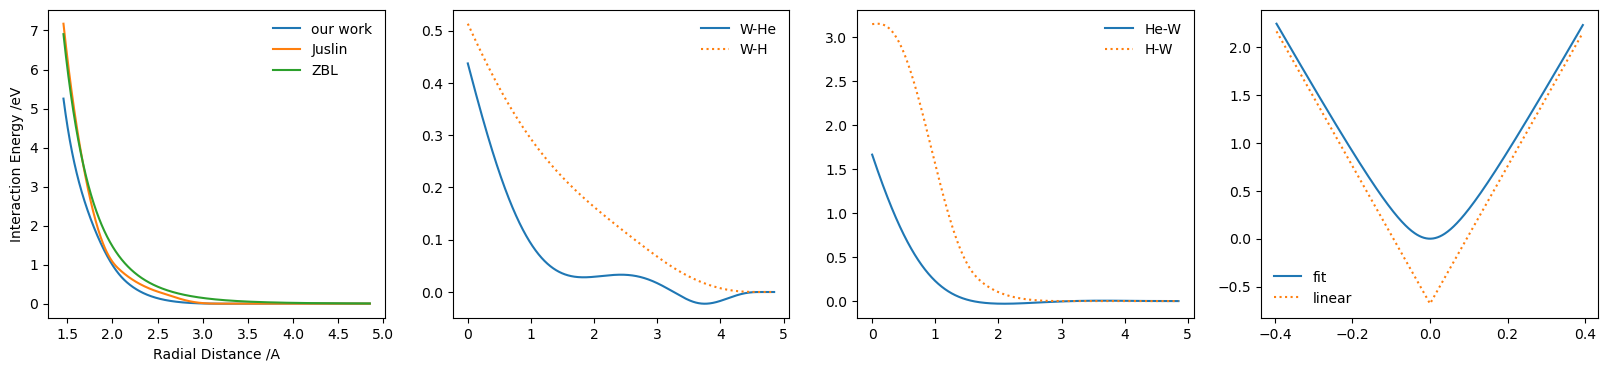

In [257]:
fig, ax = plt.subplots(1,4,figsize=(20, 4))

k = 1500
ax[0].plot(r[k + 1:], whe[k:], label='our work')
ax[0].plot(r[k + 1:], jus[k:], label='Juslin')
ax[0].plot(r[k + 1:], zbl_class.eval_zbl(r[k + 1:]), label='ZBL')
ax[0].set_xlabel('Radial Distance /A')
ax[0].set_ylabel('Interaction Energy /eV')
ax[0].legend(frameon=False)

ax[1].plot(r, w_he_p, label='W-He')
ax[1].plot(r, pot['W-H p'], label='W-H',linestyle=':')
ax[2].plot(r, pot['He-W p'], label='He-W')
ax[2].plot(r, pot['H-W p'], label='H-W', linestyle=':')

ax[1].legend(frameon=False)
ax[2].legend(frameon=False)


ax[3].plot(rho[800:1200], hef[800:1200], label='fit')

w = np.array([7.173175729203135  ,0.677984683567253 ])

ax[3].plot(rho[800:1200], np.abs(rho[800:1200]*w[0] ) - w[1], linestyle=":", label='linear')
ax[3].legend(frameon=False)

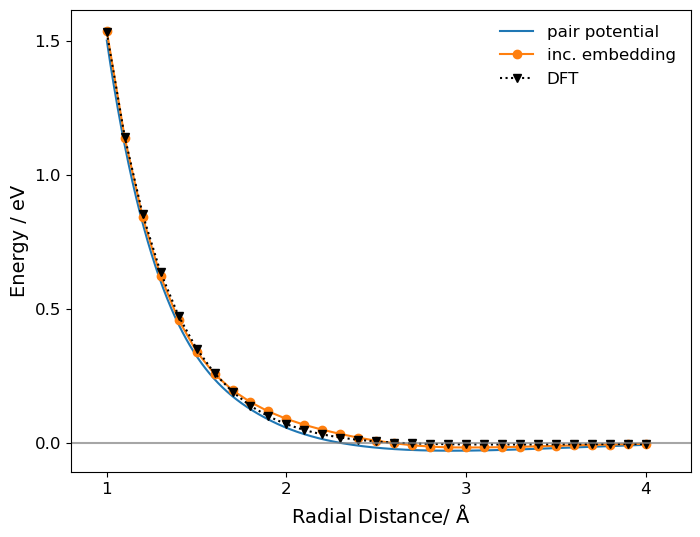

In [258]:

our_hhe = np.loadtxt('our-hhe.txt')

total_hhe = np.loadtxt('our-hhe.txt')

data_dft = np.loadtxt('h_he_pairwise.txt')
plt.figure(figsize=(fig_width, fig_height))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
hhe = pot['H-He'][1:]/r[1:]
r_plt = r[1:]
plt.plot(r_plt[np.bitwise_and(r_plt > 1, r_plt < 4)], hhe[np.bitwise_and(r_plt > 1, r_plt < 4)], label='pair potential')

r_plt = data_dft[:, 0]

plt.plot(r_plt, total_hhe, label='inc. embedding', marker='o')
plt.plot(data_dft[:,0], data_dft[:,1], label='DFT', color='black', marker='v', linestyle=':')
plt.ylabel('Energy / eV', fontsize=14)
plt.xlabel(r'Radial Distance/ $\mathrm{\AA}$', fontsize=14)
# plt.title('H-He Pairwise Interaction', fontsize=12)
plt.xticks([1, 2, 3, 4])#fontsize=12)
plt.yticks([0, 0.5, 1, 1.5])#fontsize=12)
plt.legend(fontsize=12, frameon=False)
plt.savefig('../Potential_Images/h-he-pairwise.png', bbox_inches='tight')

plt.xlim([0.8, 4.25])
plt.plot([0.8,5], [0,0], 'gray', alpha=0.7)

0.1295017183091722 0.06114245421990408


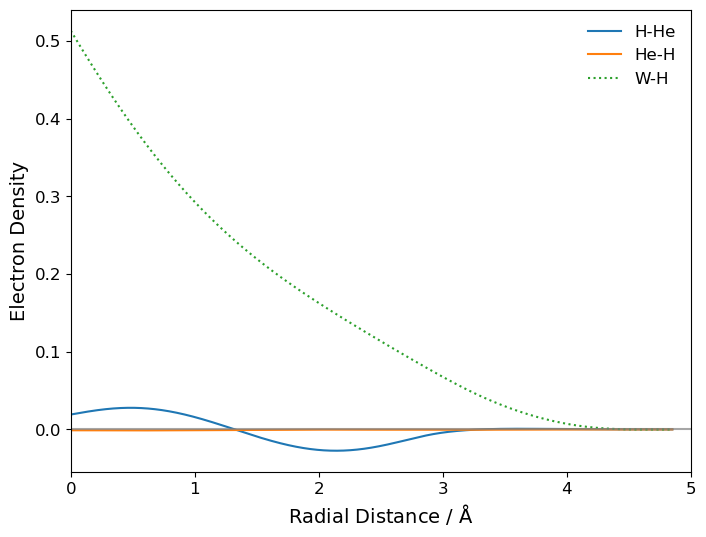

In [259]:
rho = np.linspace(pot_params['rhomin'], pot_params['rho_c'], pot_params['Nrho'])
hef = pot['He F']
w_he_p = pot['W-He p']

bonds = np.array([[2, 4], [2.8, 4], [3.61, 8]])

y = np.interp(bonds[:, 0], r, w_he_p)

e_density = np.sum( y * bonds[:, 1] )
plt.figure(figsize=(fig_width, fig_height))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.plot(r, pot['H-He p'], label='H-He')
plt.plot(r, pot['He-H p'], label='He-H')

plt.plot(r, pot['W-H p'], label='W-H', linestyle=':')

plt.legend(frameon=False, fontsize = 12)

embed = np.interp(e_density, rho, hef)


plt.xlim([0, 5])
plt.plot([0,5], [0,0], 'gray', alpha=0.7)
print(embed, e_density)
plt.xlabel(r'Radial Distance / $\mathrm{\AA}$', fontsize = 14)
plt.ylabel('Electron Density', fontsize = 14)
plt.savefig('../Potential_Images/h-he-electron_densties.png', bbox_inches='tight')

0.1295017183091722 0.06114245421990408


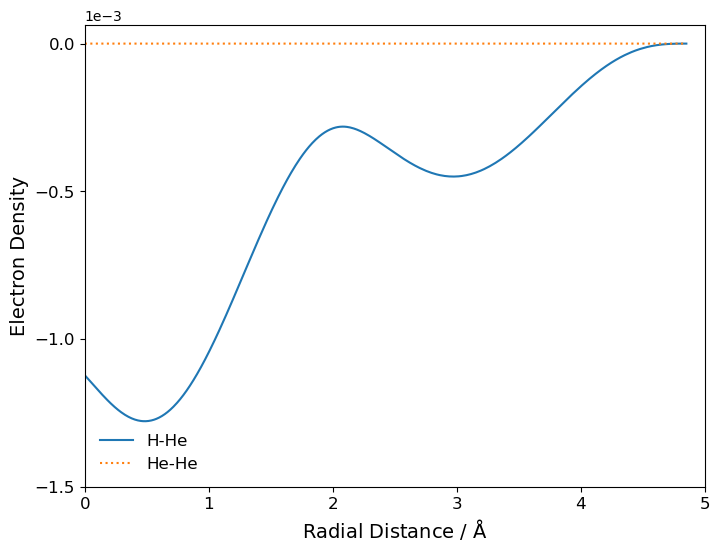

In [260]:
rho = np.linspace(pot_params['rhomin'], pot_params['rho_c'], pot_params['Nrho'])
hef = pot['He F']
w_he_p = pot['W-He p']

bonds = np.array([[2, 4], [2.8, 4], [3.61, 8]])

y = np.interp(bonds[:, 0], r, w_he_p)

e_density = np.sum( y * bonds[:, 1] )
plt.figure(figsize=(fig_width, fig_height))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.plot(r, pot['He-H p'], label='H-He')
plt.plot(r, pot['He-He p'], label='He-He',  linestyle=':')

# plt.plot(r, pot['W-H p'], label='W-H', linestyle=':')

plt.legend(frameon=False, fontsize = 12)

embed = np.interp(e_density, rho, hef)
# Set y-ticks at specified positions
plt.yticks([0, -5e-4, -1e-3, -1.5e-3])
from matplotlib.ticker import ScalarFormatter

# Format y-axis to display ticks in scientific notation
ax = plt.gca()  # Get current axis
# ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))  # Set limits for scientific notation

print(embed, e_density)
plt.xlabel(r'Radial Distance / $\mathrm{\AA}$', fontsize = 14)
plt.ylabel('Electron Density', fontsize = 14)
plt.xlim([0, 5])
# plt.plot([0,5], [0,0], 'gray', alpha=0.7)
plt.savefig('../Potential_Images/he-h-electron_densties.png', bbox_inches='tight')

0.1295017183091722 0.06114245421990408


(0.0, 5.0)

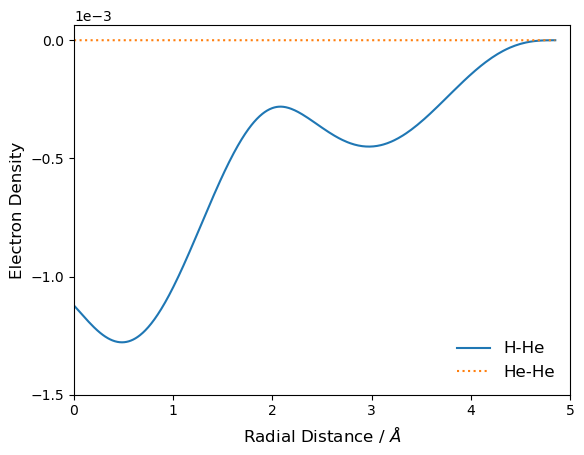

In [261]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

# Assuming pot_params, pot, and r are already defined
rho = np.linspace(pot_params['rhomin'], pot_params['rho_c'], pot_params['Nrho'])
hef = pot['He F']
w_he_p = pot['W-He p']

bonds = np.array([[2, 4], [2.8, 4], [3.61, 8]])

# Interpolate values for y based on bonds and w_he_p
y = np.interp(bonds[:, 0], r, w_he_p)

# Calculate electron density
e_density = np.sum(y * bonds[:, 1])

# Plot the data
plt.plot(r, pot['He-H p'], label='H-He')
plt.plot(r, pot['He-He p'], label='He-He', linestyle=':')
# plt.plot(r, pot['W-H p'], label='W-H', linestyle=':')

# Set up the legend
plt.legend(frameon=False, fontsize=12)

# Interpolate embed based on electron density
embed = np.interp(e_density, rho, hef)

# Set y-ticks at specified positions
plt.yticks([0, -5e-4, -1e-3, -1.5e-3])

# Get the current axis
ax = plt.gca()  
# Format y-axis to display ticks in scientific notation
ax.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))

# Print the results for debug
print(embed, e_density)

# Set axis labels and limits
plt.xlabel(r'Radial Distance / $\AA$', fontsize=12)
plt.ylabel('Electron Density', fontsize=12)
plt.xlim([0, 5])

# Save the figure
# plt.savefig('../Potential_Images/he-h-electron_densties.png')

# Optionally, show the plot (uncomment if needed)
# plt.show()


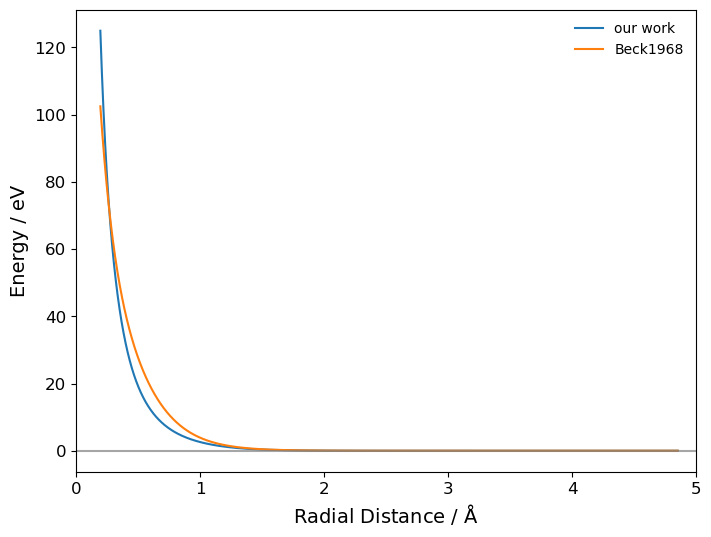

In [262]:
r = np.linspace(0, pot_params['rc'], pot_params['Nr'])[1:]

dr = pot_params['rc']/pot_params['Nr']

phi = pot['He-He'][1:] / r

plt.figure(figsize=(fig_width, fig_height))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.plot(r[200:], phi[200:], label='our work')

plt.plot(r[200:], Beck1968(r[200:]), label = 'Beck1968')

# plt.scatter(pairwise_he_he[:,0], pairwise_he_he[:,1], label='dft', color='black')
plt.legend(frameon=False)
# plt.title('He-He pair potential')

plt.xlabel(r'Radial Distance / $\mathrm{\AA}$', fontsize = 14)
plt.ylabel('Energy / eV', fontsize = 14)
plt.xlim([0, 5])
plt.plot([0,5], [0,0], 'gray', alpha=0.7)

plt.savefig('../Potential_Images/he-he-pairwise.png', bbox_inches='tight')

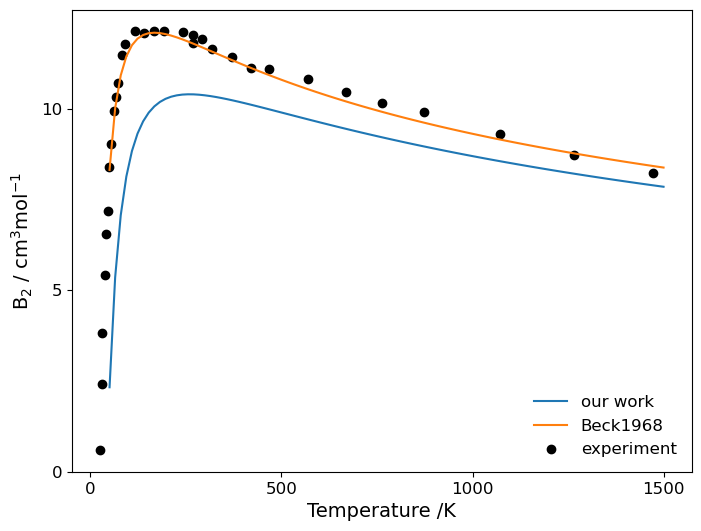

In [264]:
def eval_virial(phi, T_arr, r, dr):

    virial_coef = np.zeros(T_arr.shape)
    
    kb = 8.6173303e-5
    
    conv = 6.02214e-1

    for i, T in enumerate(T_arr):

        beta = 1 / (kb * T)

        y = ( 1 - np.exp(-beta * phi) ) * r**2

        virial_coef[i] = 2* np.pi * conv * simpson(y,x=r)

    return virial_coef

virial_coef_he_he = np.array([
        [2.47734287e+01, 5.94121916e-01],
        [2.92941502e+01, 2.40776488e+00],
        [3.07958539e+01, 3.83040639e+00],
        [3.68588657e+01, 5.40986938e+00],
        [4.17479885e+01, 6.53497823e+00],
        [4.46858331e+01, 7.17968070e+00],
        [4.75019178e+01, 8.38570392e+00],
        [5.37647405e+01, 9.02532656e+00],
        [6.15199008e+01, 9.93664731e+00],
        [6.60125239e+01, 1.03170537e+01],
        [7.25313543e+01, 1.06944122e+01],
        [8.24001392e+01, 1.14797533e+01],
        [9.07328778e+01, 1.17820755e+01],
        [1.17039231e+02, 1.21403483e+01],
        [1.41069613e+02, 1.20965893e+01],
        [1.67450895e+02, 1.21365022e+01],
        [1.93516850e+02, 1.21478229e+01],
        [2.41917917e+02, 1.21190856e+01],
        [2.67315755e+02, 1.20323657e+01],
        [2.91396089e+02, 1.19211176e+01],
        [2.68130785e+02, 1.18153354e+01],
        [3.17493260e+02, 1.16470198e+01],
        [3.69327808e+02, 1.14298383e+01],
        [4.19601366e+02, 1.11111245e+01],
        [4.67439296e+02, 1.10837355e+01],
        [5.70002943e+02, 1.08218509e+01],
        [6.68648934e+02, 1.04696549e+01],
        [7.63553410e+02, 1.01675917e+01],
        [8.72549304e+02, 9.91475627e+00],
        [1.07102569e+03, 9.29054054e+00],
        [1.26456401e+03, 8.73262548e+00],
        [1.47116726e+03, 8.23063465e+00]
        ])

T_arr = np.linspace(50, 1500, 100)

Z = 2
a = 0.529

embed = 5.5 * (Z/a)**3  * (Z/np.pi) * np.exp(-2 * Z * r/ a)

virial_beck = eval_virial(Beck1968(r), T_arr, r, dr)

virial_pot = eval_virial(phi + embed, T_arr,r, dr)


plt.figure(figsize=(fig_width, fig_height))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.plot(T_arr, virial_pot, label='our work')

plt.plot(T_arr, virial_beck, label='Beck1968')

plt.scatter(virial_coef_he_he[:,0], virial_coef_he_he[:,1], color='black',label='experiment')

plt.legend(frameon=False, loc='lower right', fontsize = 12)

# plt.title('Helium Real Gas Law (Virial) Coefficient', fontsize=12)
plt.xticks([0,500, 1000, 1500], fontsize=12)
plt.yticks([0,5, 10], fontsize=12)
plt.xlabel('Temperature /K', fontsize=14)
plt.ylabel(r'$\mathrm{B_2}$ / $\mathrm{cm^3 mol^{-1}}$', fontsize=14)

plt.savefig('../Potential_Images/he_virial_coef.png', bbox_inches='tight')